<a href="https://colab.research.google.com/github/LightEagle89/test2/blob/main/%D0%94%D0%97_%E2%84%96_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [236]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# Dataset

In [2]:
!git clone https://github.com/SteffiPeTaffy/machineLearningAZ.git

Cloning into 'machineLearningAZ'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


In [3]:
!ls /content/machineLearningAZ

'Machine Learning A-Z Template Folder'	 Python   R


In [4]:
!ls /content/machineLearningAZ/'Machine Learning A-Z Template Folder'/'Part 4 - Clustering'/'Section 25 - Hierarchical Clustering'

Mall_Customers.csv


In [5]:
df = pd.read_csv("/content/machineLearningAZ/Machine Learning A-Z Template Folder/Part 4 - Clustering/Section 25 - Hierarchical Clustering/Mall_Customers.csv")

In [ ]:
df.head(8)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [ ]:
df.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Graphs

In [ ]:
df._get_numeric_data().columns.shape

(4,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e0e233fd0>,
      dtype=object)

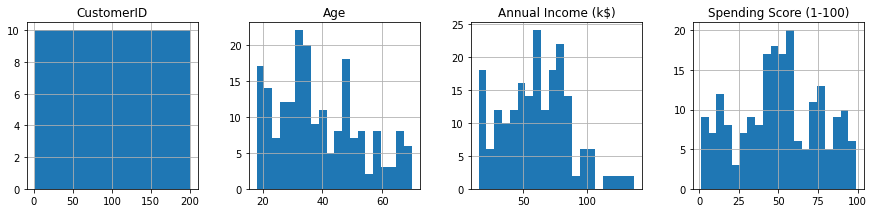

In [ ]:
df[df._get_numeric_data().columns].hist(figsize=(15, 15), layout=(4,4), bins=20)

# Алгоритмы

# KMeans++

Определим признаки пользователя, исходя из зависимостей возраста и оценки расходов.
Кластеризация kmeans для различных значений k (1 - 10)
wss - общая сумма квадрата в кластере




In [ ]:
x = df.iloc[:, [2, 4]].values

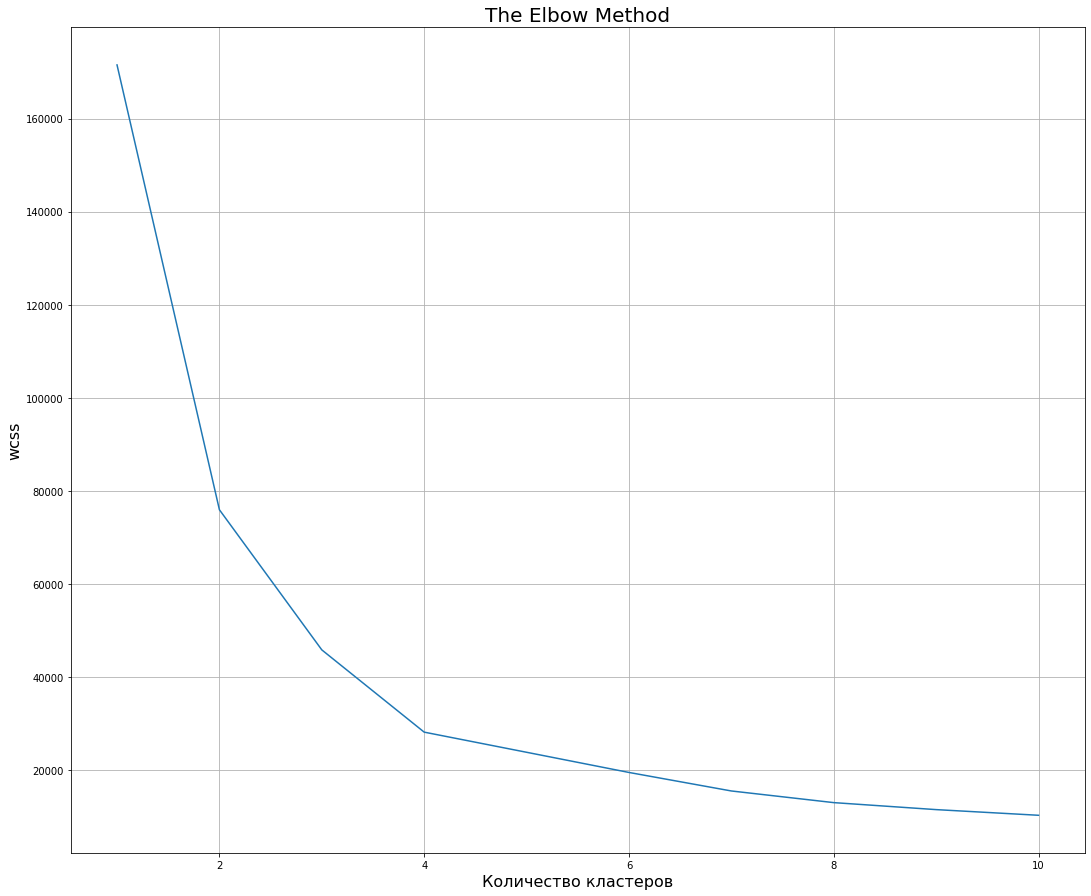

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 12)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Количество кластеров', fontsize = 16)
plt.ylabel('wcss', fontsize = 16)
plt.show()

Для 4 кластеров:

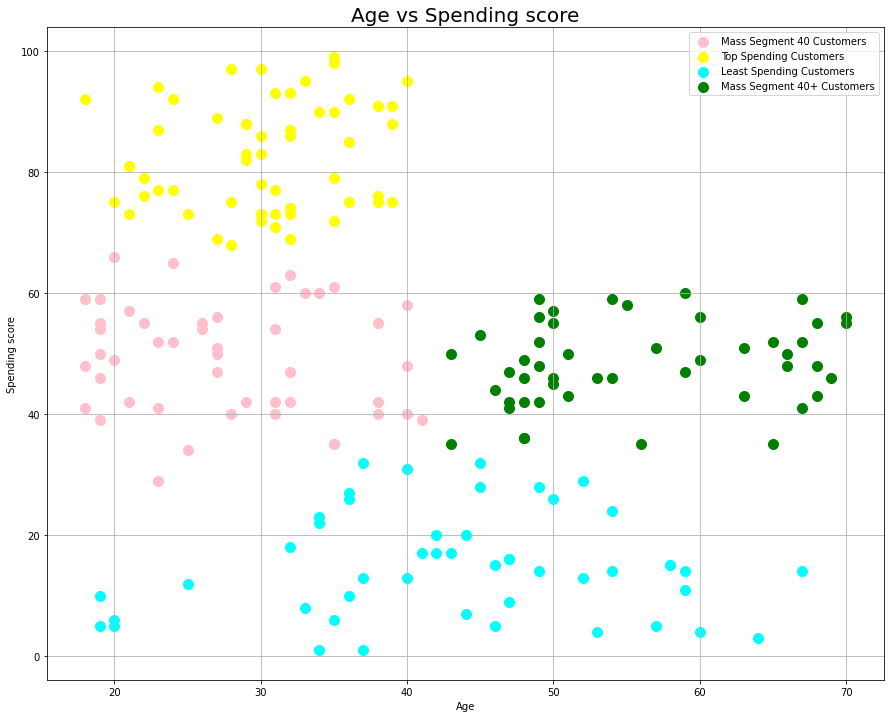

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Mass Segment 40 Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Top Spending Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Least Spending Customers')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'green', label = 'Mass Segment 40+ Customers')

plt.title('Age vs Spending score', fontsize = 20)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()
plt.show()

Для 3 кластеров:

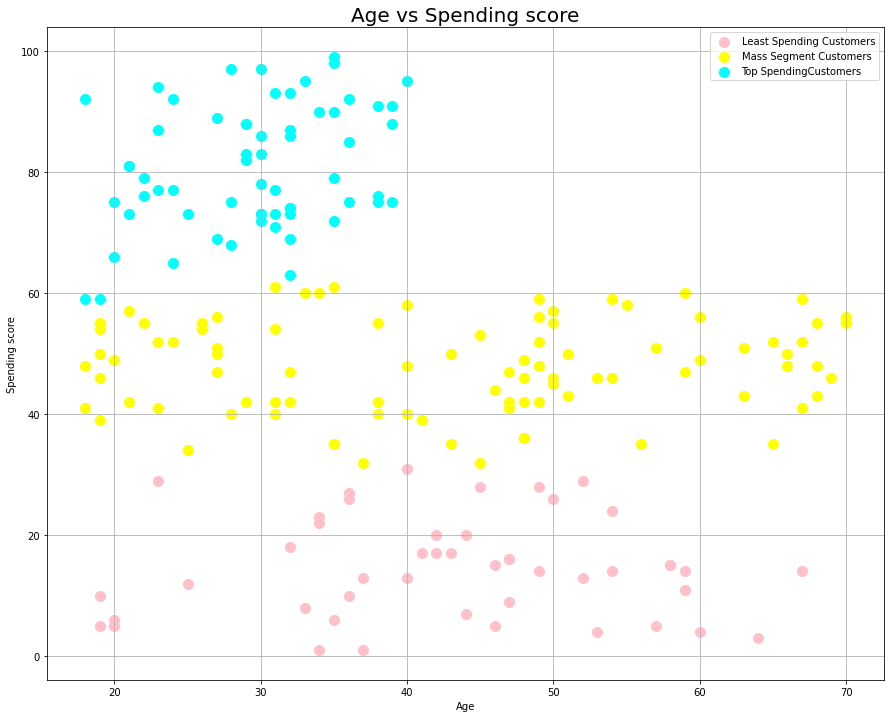

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Least Spending Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Mass Segment Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Top SpendingCustomers')

plt.title('Age vs Spending score', fontsize = 20)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()
plt.show()

Для 2 кластеров:

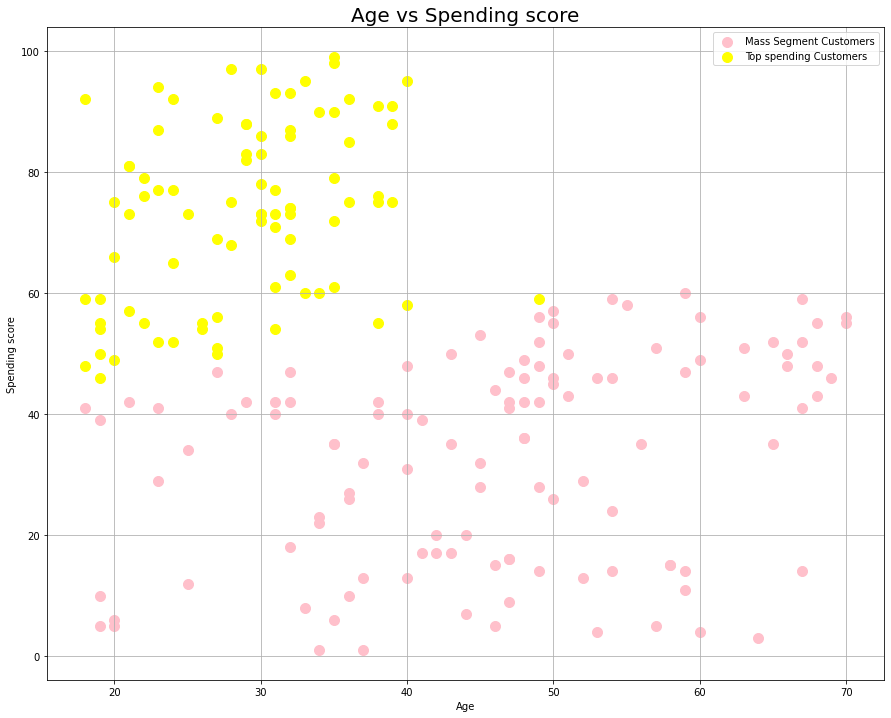

In [ ]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Mass Segment Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Top spending Customers')

plt.title('Age vs Spending score', fontsize = 20)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()
plt.show()

Таким образом, мы видим, что можно сгруппировать клиентов в зависимости от оценки расходов и возраста на различное количество групп (от 2 до 4). При этом наиболее наглядным является разделение на 3 кластера: по ним можно определить, что клиенты с наиболее высоким признаком оценки расходов (свыше 60) - люди преимущественно в возрасте до 40 лет, наиболее лояльные клиенты; средний признак оценки расходов (от 35 до 60) соответствует всем возрастам, т.е. всем клиентам (соответственно, это некий масс-сегмент продуктов/услуг, "обычные" покупатели). Наконец, низкий признак оценки расходов (от 0 до 35) соответствует группе клиентов возрастом преимущественно от 30 до 60, при этом есть определенные выбросы и около 20 лет (это клиенты, кто скорее всего редко пользуется услугами/товарами магазина).

Теперь определим признаки пользователя, исходя из зависимостей дохода и оценки расходов.

In [ ]:
x = df.iloc[:, [3, 4]].values

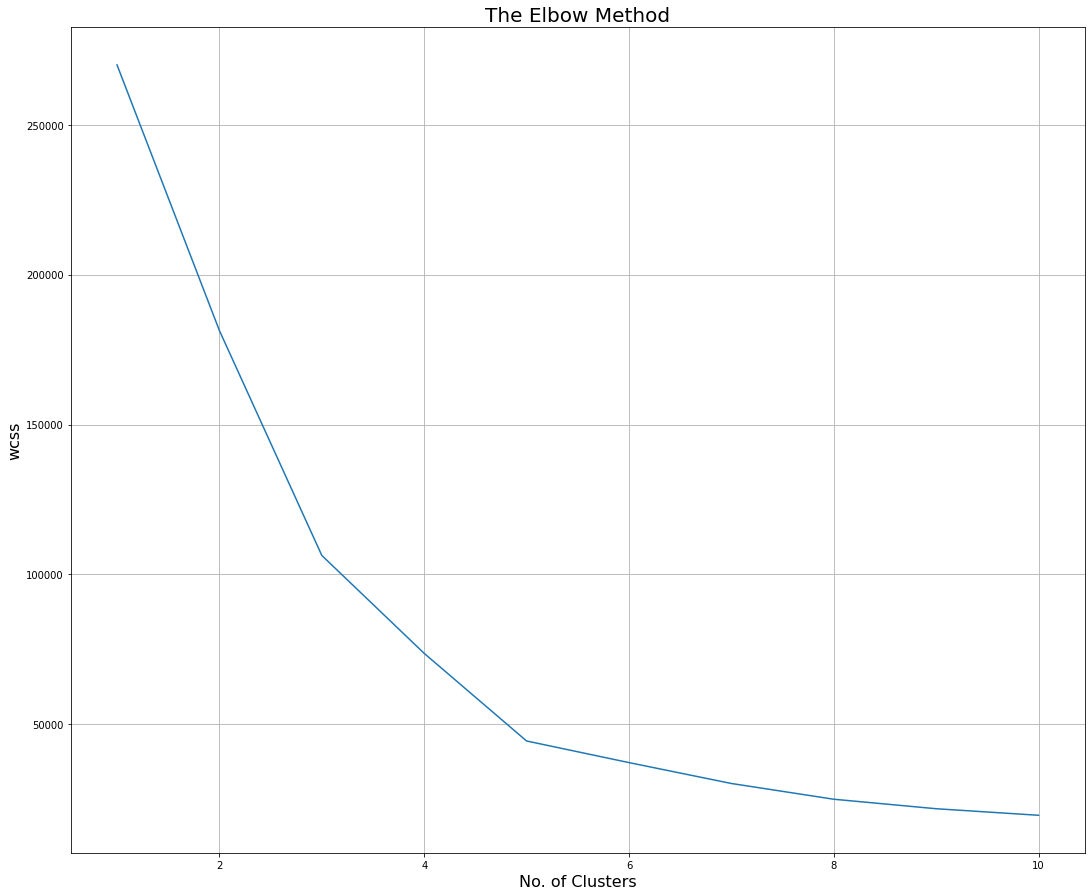

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 12)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters', fontsize = 16)
plt.ylabel('wcss', fontsize = 16)
plt.show()

Для 3 кластеров:

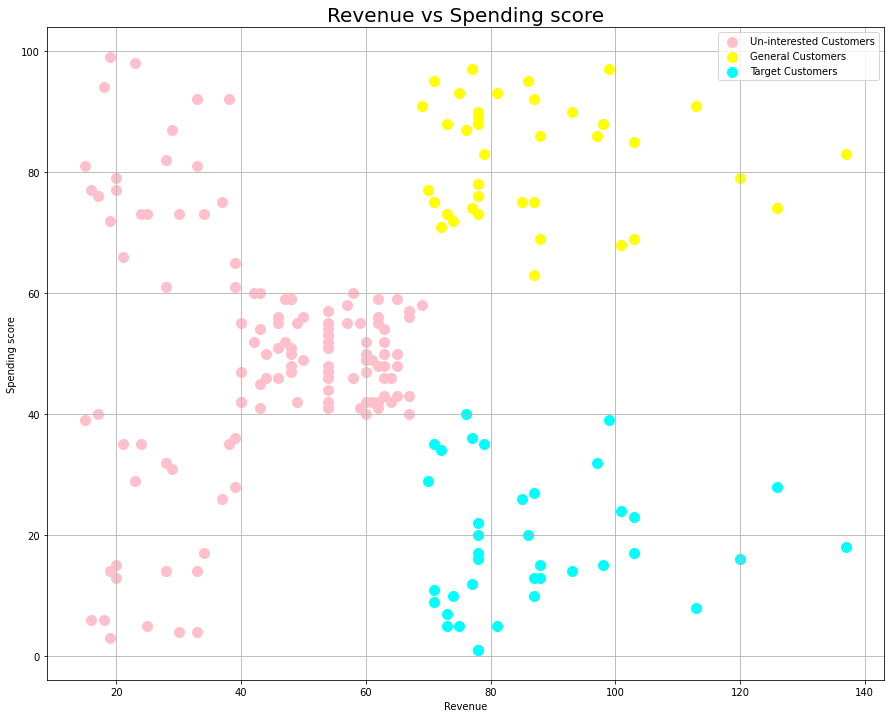

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')

plt.title('Revenue vs Spending score', fontsize = 20)
plt.grid()
plt.xlabel('Revenue')
plt.ylabel('Spending score')
plt.legend()
plt.show()

Для 4 кластеров:

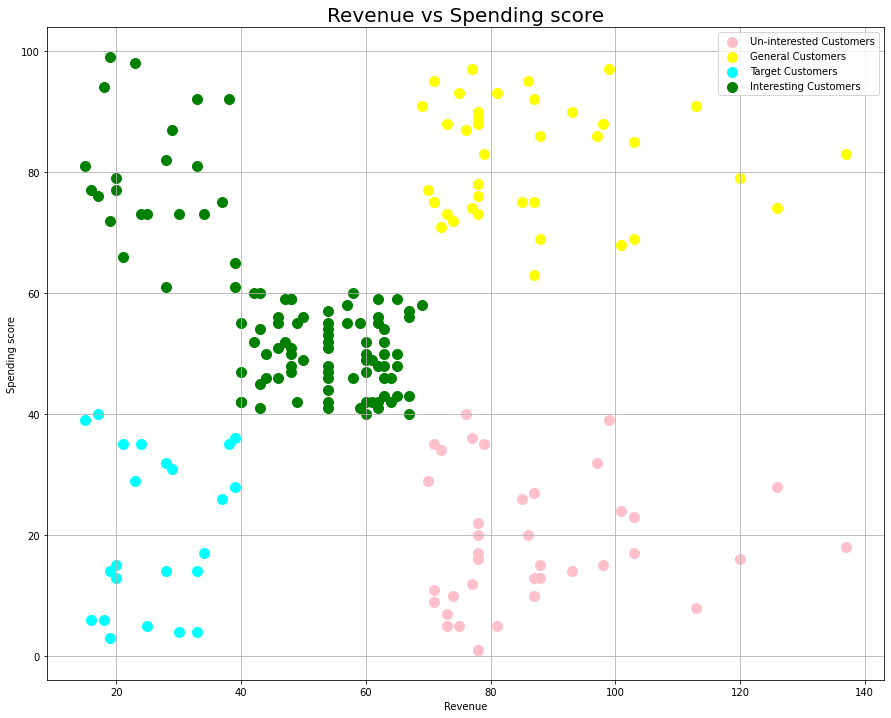

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'green', label = 'Interesting Customers')

plt.title('Revenue vs Spending score', fontsize = 20)
plt.grid()
plt.xlabel('Revenue')
plt.ylabel('Spending score')
plt.legend()
plt.show()

Для 5 кластеров:

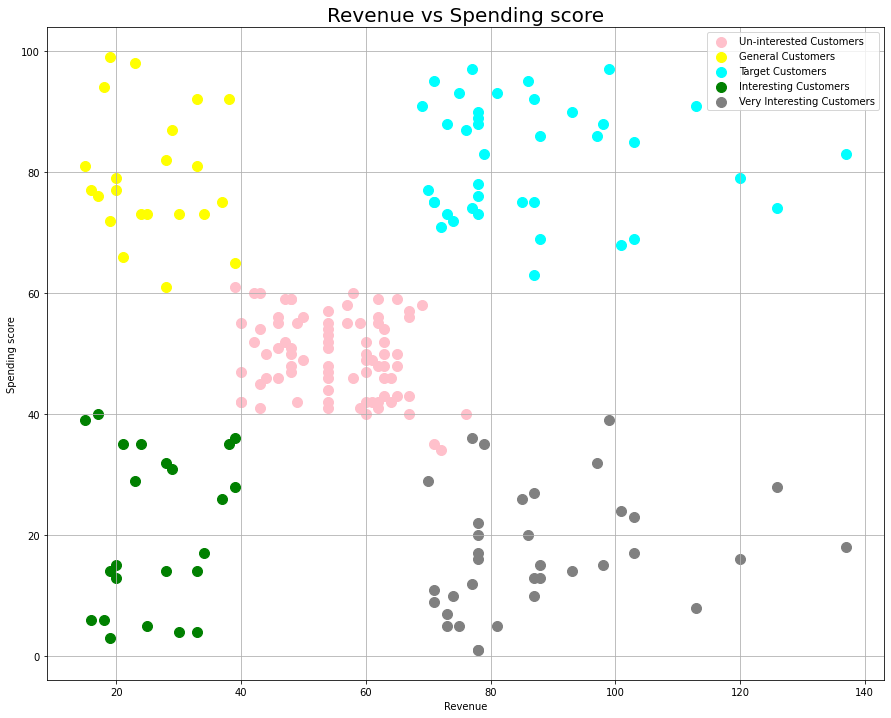

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'green', label = 'Interesting Customers')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'grey', label = 'Very Interesting Customers')

plt.title('Revenue vs Spending score', fontsize = 20)
plt.grid()
plt.xlabel('Revenue')
plt.ylabel('Spending score')
plt.legend()
plt.show()

Таким образом, можно сгруппировать клиентов в зависимости от оценки расходов и дохода на различное количество групп (от 3 до 5). Однако само по себе сравнение годового дохода клиентов и оценки расходов малоинформативно (разве что можно указать, что группа клиентов с доходом от 40 до 70 также соответствует среднему признаку оценки расходов (от 40 до 60).

MeanShift

In [188]:
x = df.iloc[:, [3, 4]].values

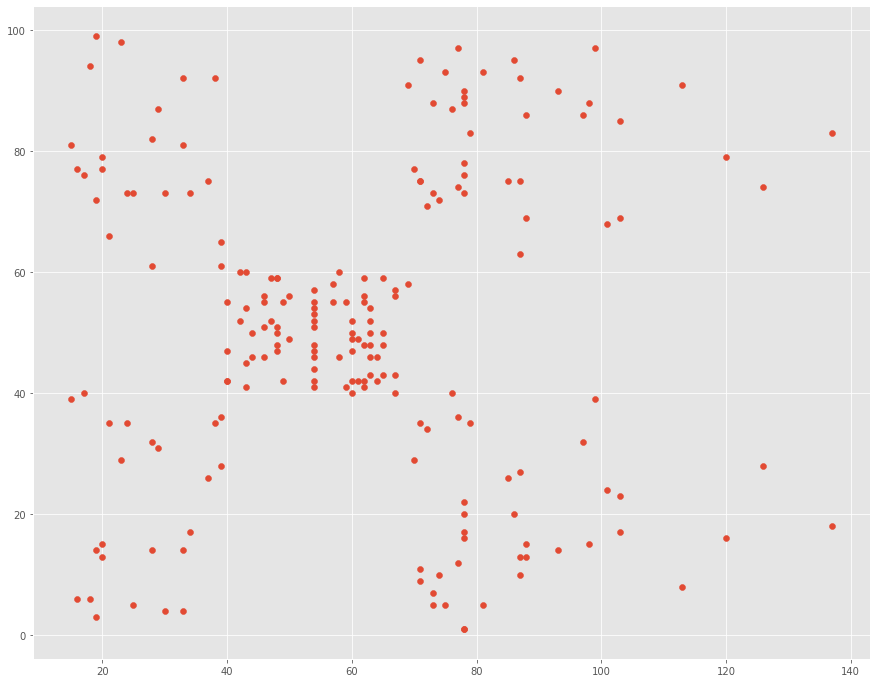

In [203]:
ms = MeanShift()
ms.fit(X)
plt.scatter(x[:, 0], x[:, 1], marker ='o')
plt.show()

Исходя из представленных данных, можно сделать вывод о том, что только доход от 40 до 70 влияет на оценку расходов (соответствует уровню признака от 40 до 60), что в целом является средним показатем.

# TSNE

In [130]:
from sklearn import preprocessing
def number_encode_features(init_df):
    result = init_df.copy() 
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: 
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column]) 
    return result, encoders

encoded_data, encoders = number_encode_features(df) 
encoded_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [215]:
x = encoded_data.iloc[:, [1, 4]].values

<Figure size 864x864 with 0 Axes>

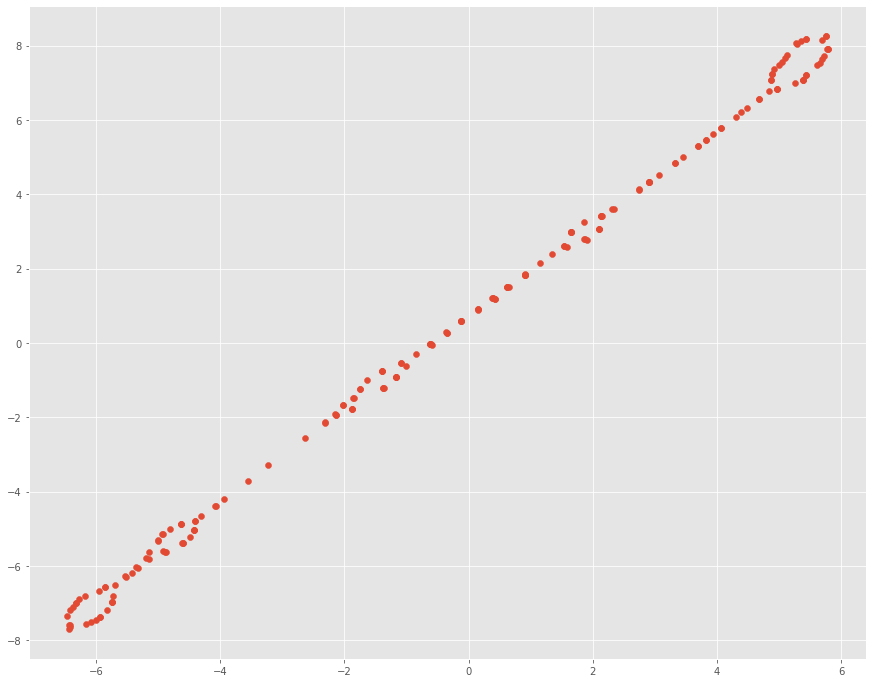

<Figure size 864x864 with 0 Axes>

In [221]:
from sklearn.manifold import TSNE

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(x)

tsne = TSNE(random_state=17, perplexity=50)
tsne_representation = tsne.fit_transform(x)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

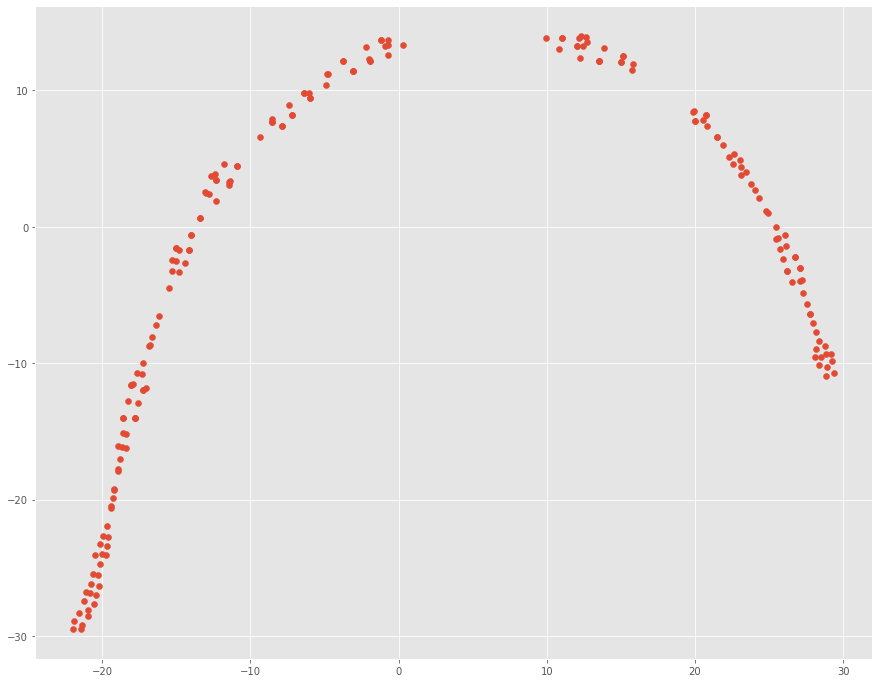

<Figure size 864x864 with 0 Axes>

In [220]:
from sklearn.manifold import TSNE

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(x)

tsne = TSNE(random_state=17, perplexity=15)
tsne_representation = tsne.fit_transform(x)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

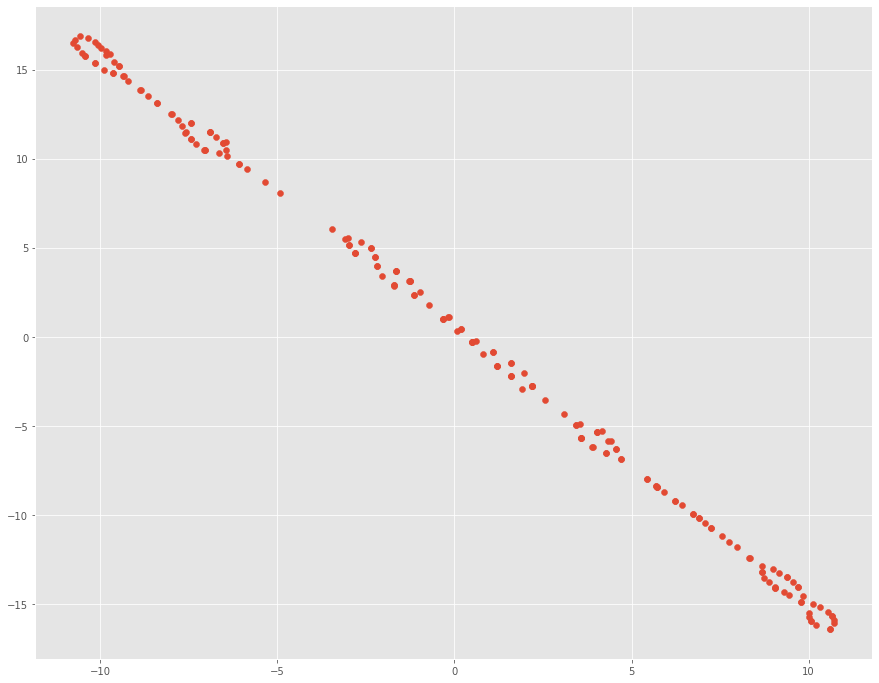

<Figure size 864x864 with 0 Axes>

In [223]:
from sklearn.manifold import TSNE

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(x)

tsne = TSNE(random_state=17, perplexity=30)
tsne_representation = tsne.fit_transform(x)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

Полученные данные показывают, что признак оценки расходов в разрезе мужского и женского пола разделяется практически равномерно (пополам).

# HAC

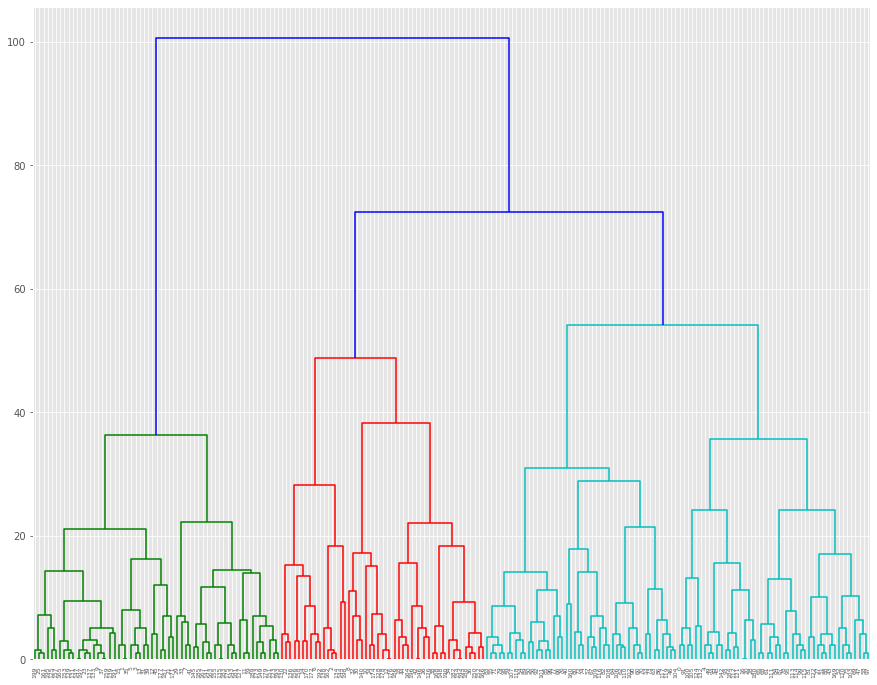

<Figure size 720x504 with 0 Axes>

In [235]:
import scipy.cluster.hierarchy as shc
x = encoded_data.iloc[:, [2, 4]].values
dend = shc.dendrogram(shc.linkage(x, method='complete'),leaf_rotation=90,leaf_font_size=6)
plt.figure(figsize=(10, 7))
plt.show()

Произошло разбиение на три кластера в зависимости от уровня оценки расходов и возраста